## Импорт библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

##Загрузка и первичный осмотр данных

In [ ]:
userdata = pd.read_csv('userdata.csv')
orderdata = pd.read_csv('orderdata.csv')
interactiondata = pd.read_csv('interactiondata.csv')

# Удаление пользователей с некорректным возрастом окончания магистратуры
userdata = userdata[(userdata['education'] != 'masters') | (userdata['age'] >= 22)]

# Удаление отрицательных значений в среднем чеке
orderdata = orderdata[orderdata['avg_bill'] >= 0]

# Удаление выбросов для количественных признаков
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.0 * IQR
        upper_bound = Q3 + 1.0 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

userdata = remove_outliers(userdata, ['age', 'income', 'kids', 'teenagers'])
orderdata = remove_outliers(orderdata, ['avg_bill'])
interactiondata = remove_outliers(interactiondata, ['complain_count', 'discount_purchases_count_avg', 'catalogue_purchases_count_avg',
                                                    'store_purchases_count_avg', 'website_purchases_count_avg', 'website_visit_count_avg',
                                                    'mobile_purchases_count_avg', 'mobile_visit_count_avg'])
# Объединение данных
merged_data = userdata.merge(orderdata, left_on='userid', right_on='userId').merge(interactiondata, left_on='userid', right_on='UserId')
merged_data.dropna(inplace=True)

print("Userdata:\n", userdata.head(),"\n")
print("Orderdata:\n", orderdata.head(),"\n")
print("Interactiondata:\n", interactiondata.head(),"\n")

# Проверка наличия пропущенных значений
print("Missing values in userdata:\n", userdata.isnull().sum(), "\n")
print("Missing values in orderdata:\n", orderdata.isnull().sum(), "\n")
print("Missing values in interactiondata:\n", interactiondata.isnull().sum(), "\n")

# Основные статистические показатели
print("Userdata statistics:\n", userdata.describe(), "\n")
print("Orderdata statistics:\n", orderdata.describe(), "\n")
print("Interactiondata statistics:\n", interactiondata.describe(), "\n")


Userdata:
                                  userid        join_datetime  age    income  \
0  dc9d5bd4-ec88-4546-b46c-fe9d6eaba691  2023-09-11 21:09:07   70  115443.0   
1  35821e5c-cc2a-425c-a270-5377de69177c  2023-12-25 14:09:54   71  107793.0   
2  d4810416-7e2a-4d1b-8440-30f39cd42aca  2022-11-14 12:31:05   13   25508.0   
3  b56b1df3-8a67-4d61-82cf-dd9ed659bd63  2023-12-07 01:57:02   20   81139.0   
5  607a82ac-14b3-45db-85c1-e0d668b1793a  2024-05-13 20:35:20   58   70183.0   

   kids  teenagers   marital education  
0     0          0  divorced  bachelor  
1     0          1   married   masters  
2     0          0    single       NaN  
3     0          0    single  bachelor  
5     0          0    single   masters   

Orderdata:
                                  userId category  avg_bill
0  2c6336a2-852b-48af-9150-9b9030387f5d     fish     432.0
1  1085e67c-3c4e-4903-b3e9-16631132c655    other     620.0
2  99792dfd-8c62-4903-92b2-a83dfd392cb1   sweets     233.0
3  ad50b3da-da8d-4

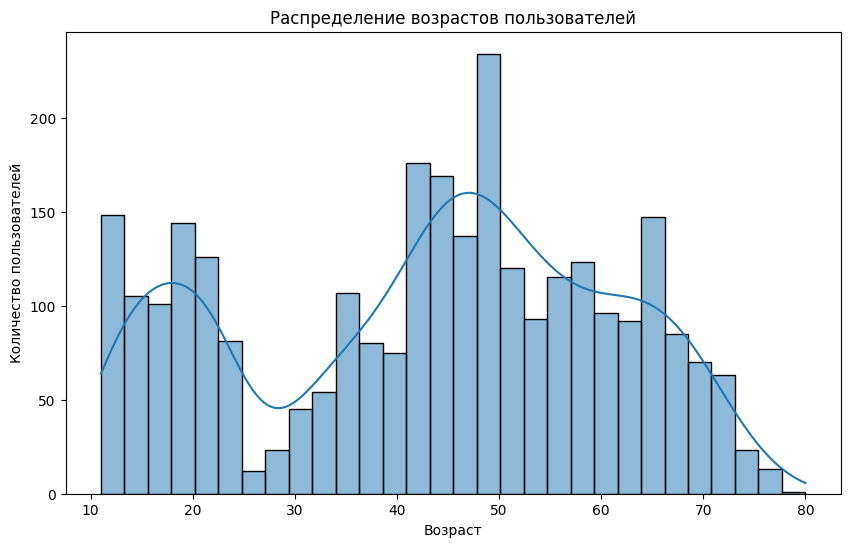

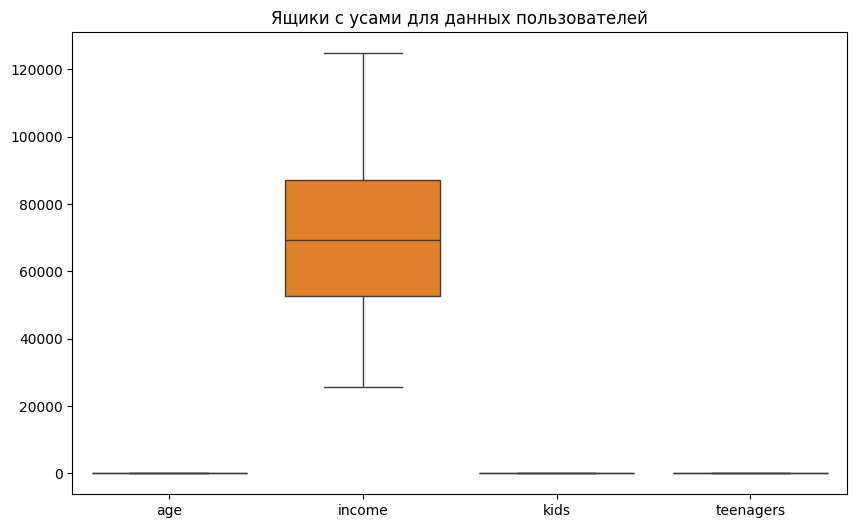

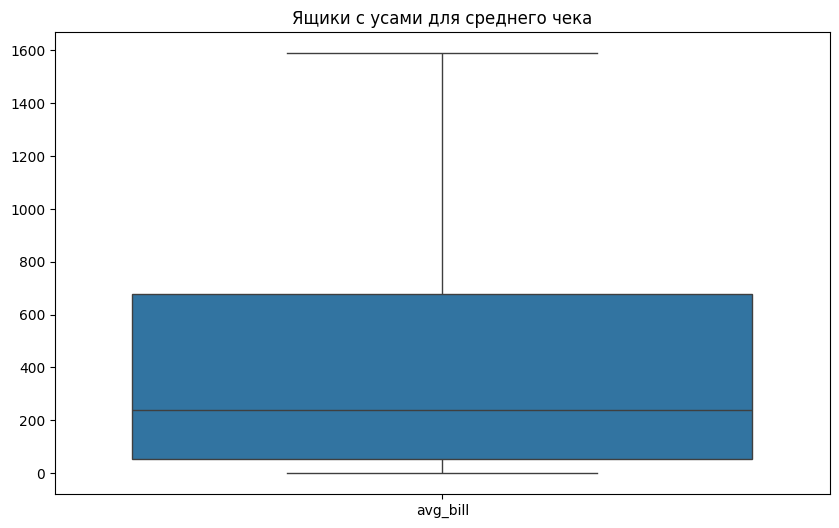

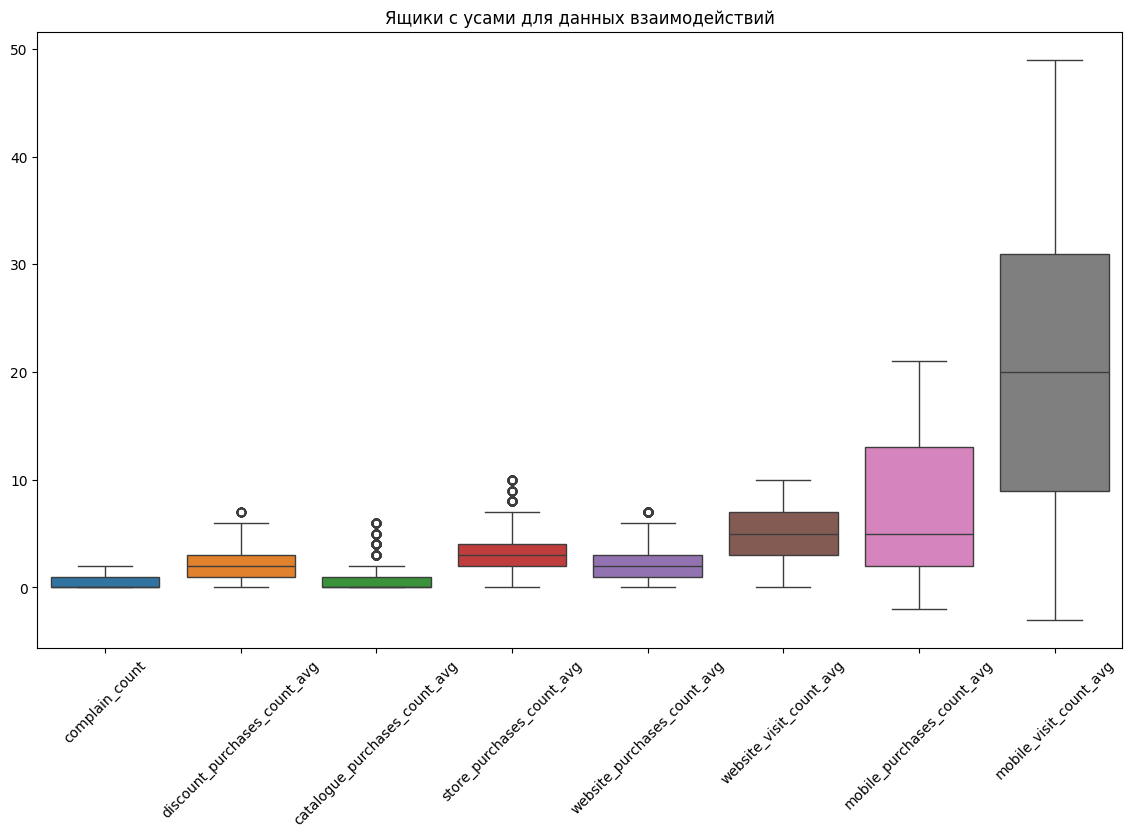

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(userdata['age'], bins=30, kde=True)
plt.title('Распределение возрастов пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=userdata[['age', 'income', 'kids', 'teenagers']])
plt.title('Ящики с усами для данных пользователей')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=orderdata[['avg_bill']])
plt.title('Ящики с усами для среднего чека')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=interactiondata[['complain_count', 'discount_purchases_count_avg', 'catalogue_purchases_count_avg',
                                  'store_purchases_count_avg', 'website_purchases_count_avg', 'website_visit_count_avg',
                                  'mobile_purchases_count_avg', 'mobile_visit_count_avg']])
plt.title('Ящики с усами для данных взаимодействий')
plt.xticks(rotation=45)
plt.show()


**Распределение возрастов пользователей:** Преимущественное количество пользователей возрастом от 40 до 50 лет

**Ящики с усами для данных пользователей:** Доходы большинства находятся на уровне от 55 тысяч до 85 тысяч

**Ящики с усами для среднего чека:** Средний чек начинается от 50 до 750 рублей

**Ящики с усами для данных взаимодействий:** число жалоб, среднее число заказов, в которых хотя бы 1 товар со скидкой (в месяц), среднее число заказов при помощи онлайн-каталога (в месяц), среднее число заказов в очных магазинах (в месяц), среднее число заказов сделанных с сайта (в месяц), среднее число посещений сайта (в месяц), среднее число заказов сделанных в мобильном приложении (в месяц), среднее число посещений мобильного приложения (в месяц). Можно сделать вывод, что посещение сайта, приложение выше, практически, в 2 раза больше кол-ва заказов на сайте, в приложение. И то что заказов онлайн больше, чем покупок очно, в магазине

## Дополнительные графики

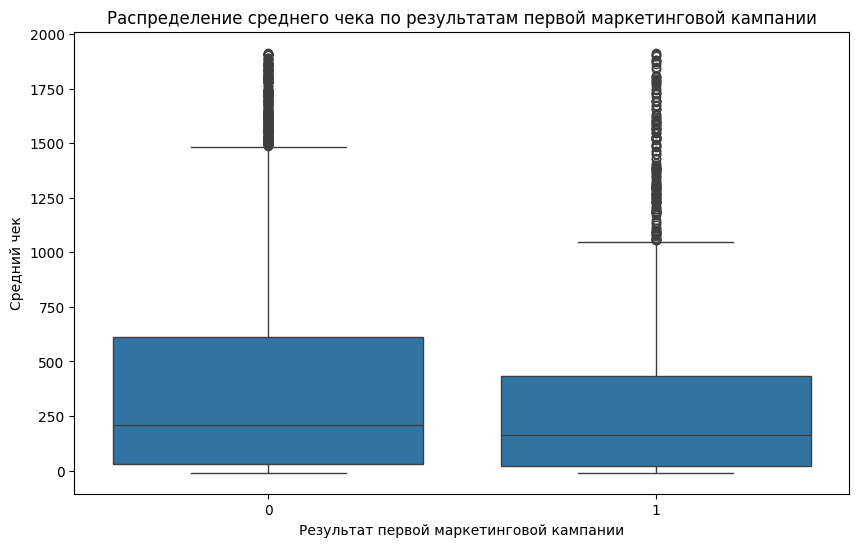

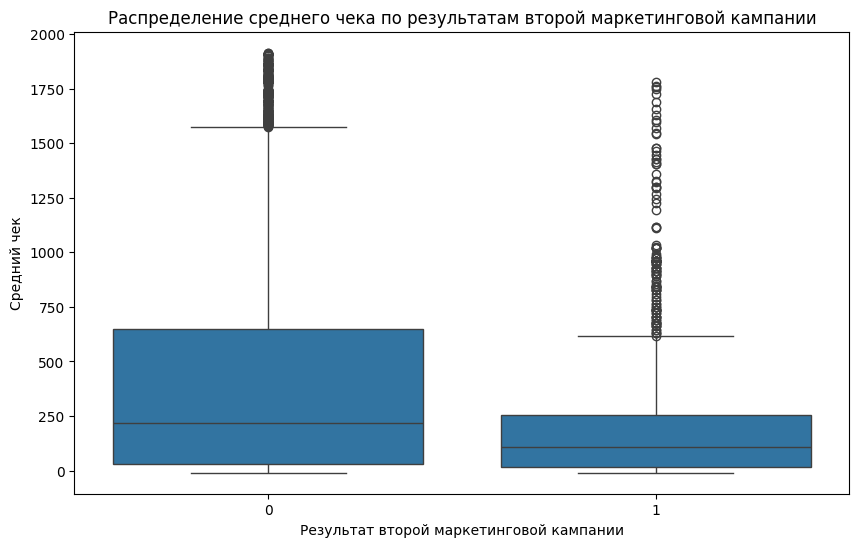

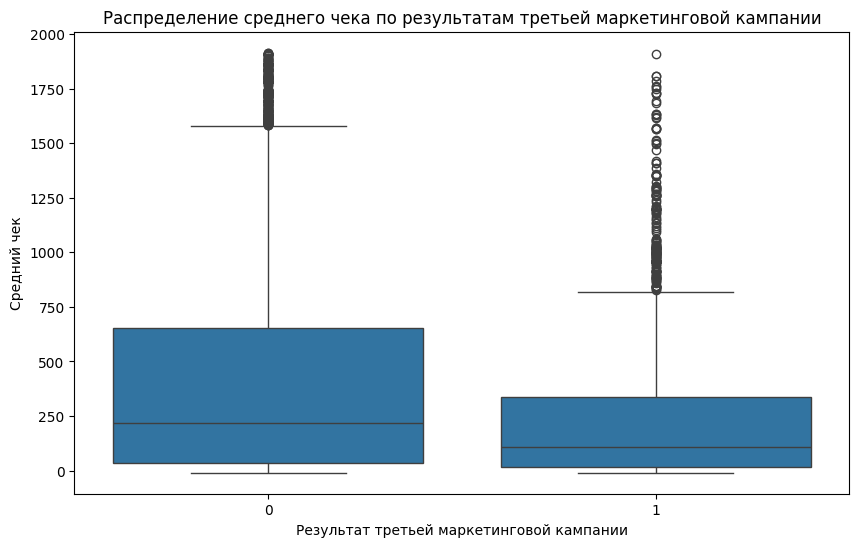

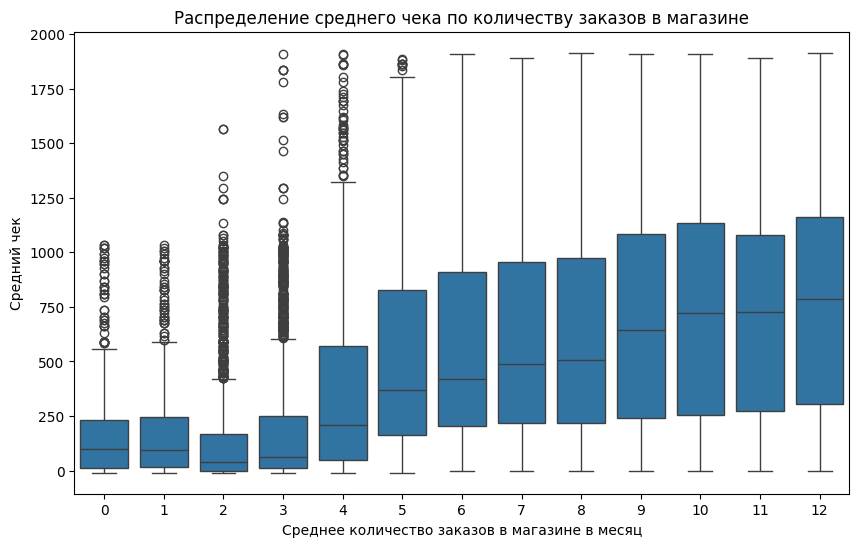

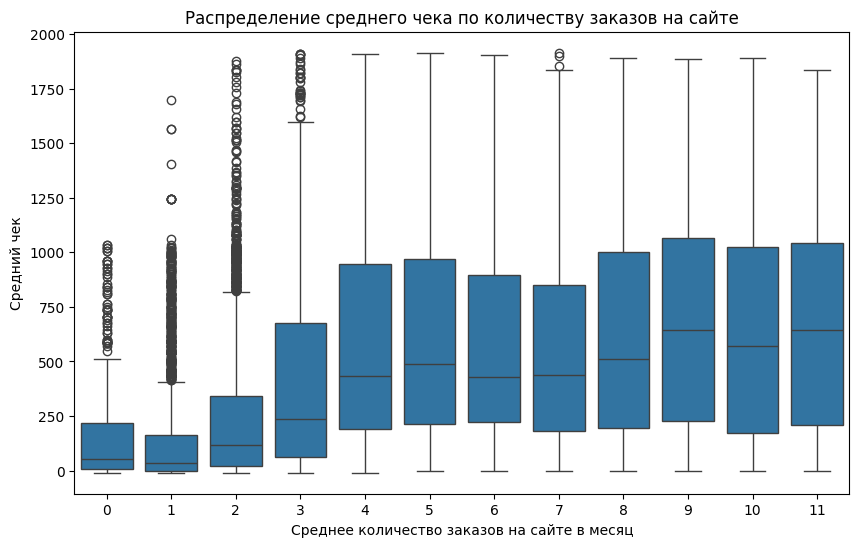

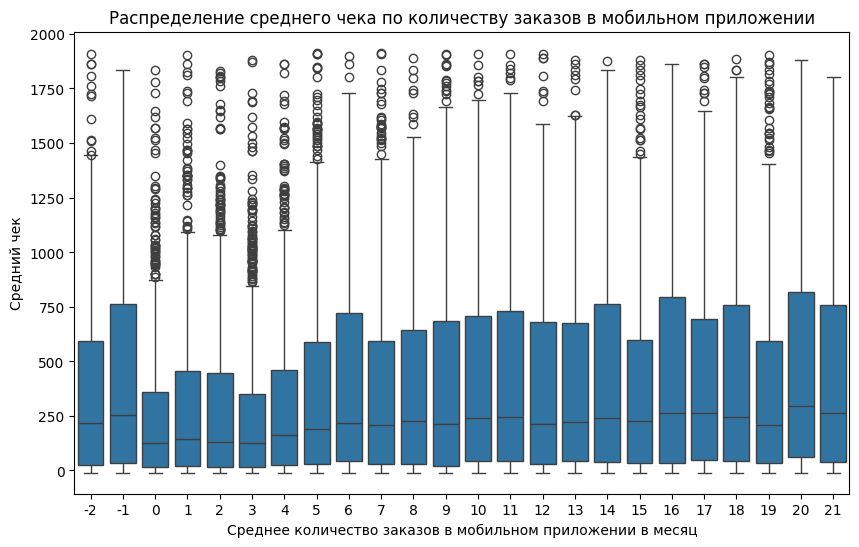

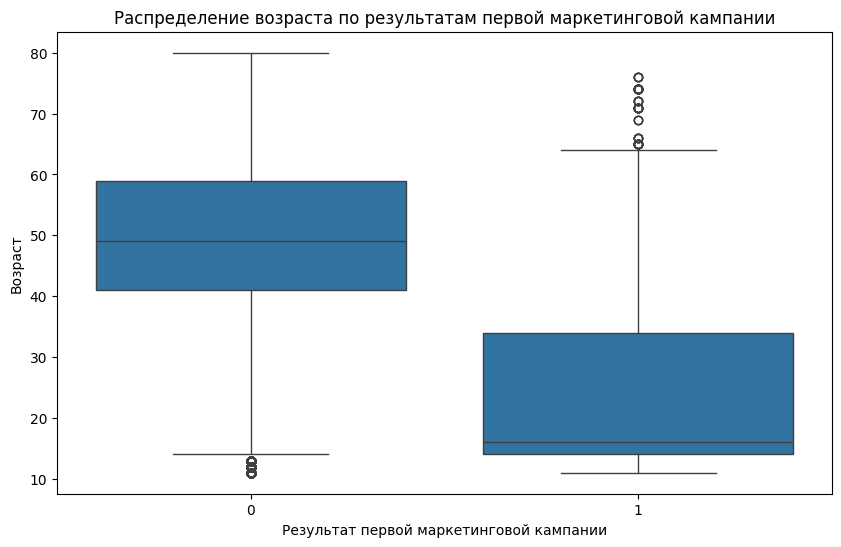

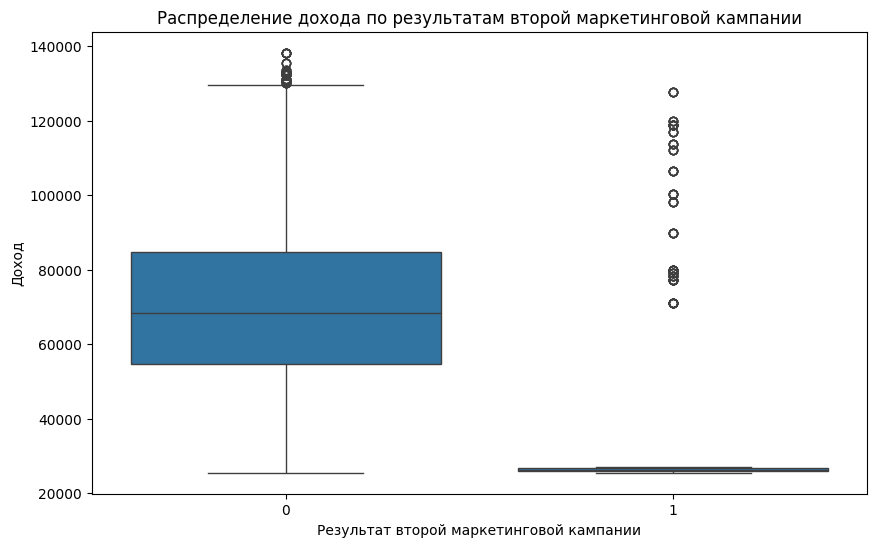

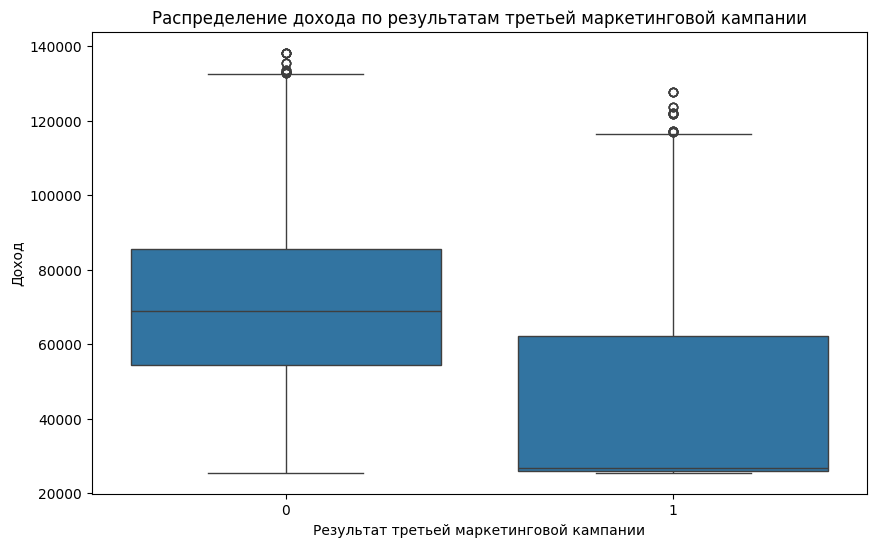

In [ ]:
# Распределение среднего чека по результатам маркетинговых кампаний
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data_clean, x='marketing_company_outcome_1', y='avg_bill')
plt.title('Распределение среднего чека по результатам первой маркетинговой кампании')
plt.xlabel('Результат первой маркетинговой кампании')
plt.ylabel('Средний чек')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data_clean, x='marketing_company_outcome_2', y='avg_bill')
plt.title('Распределение среднего чека по результатам второй маркетинговой кампании')
plt.xlabel('Результат второй маркетинговой кампании')
plt.ylabel('Средний чек')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data_clean, x='marketing_company_outcome_3', y='avg_bill')
plt.title('Распределение среднего чека по результатам третьей маркетинговой кампании')
plt.xlabel('Результат третьей маркетинговой кампании')
plt.ylabel('Средний чек')
plt.show()

# Распределение среднего чека по каналам заказа
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data_clean, x='store_purchases_count_avg', y='avg_bill')
plt.title('Распределение среднего чека по количеству заказов в магазине')
plt.xlabel('Среднее количество заказов в магазине в месяц')
plt.ylabel('Средний чек')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data_clean, x='website_purchases_count_avg', y='avg_bill')
plt.title('Распределение среднего чека по количеству заказов на сайте')
plt.xlabel('Среднее количество заказов на сайте в месяц')
plt.ylabel('Средний чек')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data_clean, x='mobile_purchases_count_avg', y='avg_bill')
plt.title('Распределение среднего чека по количеству заказов в мобильном приложении')
plt.xlabel('Среднее количество заказов в мобильном приложении в месяц')
plt.ylabel('Средний чек')
plt.show()

# Распределение ключевых характеристик ЦА для каждой маркетинговой кампании
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data_clean, x='marketing_company_outcome_1', y='age')
plt.title('Распределение возраста по результатам первой маркетинговой кампании')
plt.xlabel('Результат первой маркетинговой кампании')
plt.ylabel('Возраст')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data_clean, x='marketing_company_outcome_2', y='income')
plt.title('Распределение дохода по результатам второй маркетинговой кампании')
plt.xlabel('Результат второй маркетинговой кампании')
plt.ylabel('Доход')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data_clean, x='marketing_company_outcome_3', y='income')
plt.title('Распределение дохода по результатам третьей маркетинговой кампании')
plt.xlabel('Результат третьей маркетинговой кампании')
plt.ylabel('Доход')
plt.show()

## Вычисление корреляции

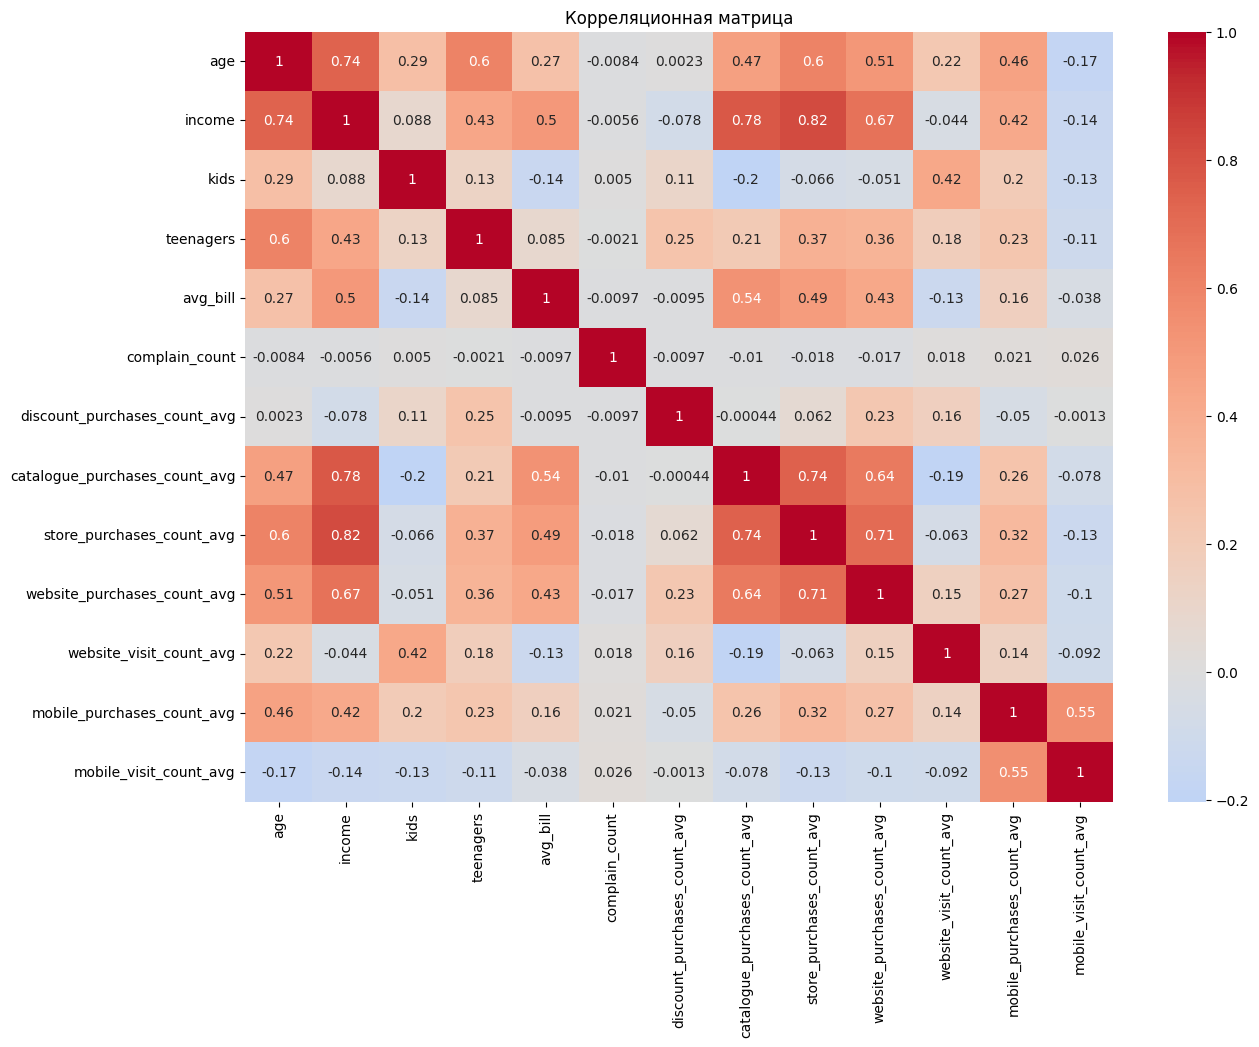

In [ ]:
correlations = merged_data[['age', 'income', 'kids', 'teenagers', 'avg_bill', 'complain_count',
                            'discount_purchases_count_avg', 'catalogue_purchases_count_avg',
                            'store_purchases_count_avg', 'website_purchases_count_avg',
                            'website_visit_count_avg', 'mobile_purchases_count_avg',
                            'mobile_visit_count_avg']].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.show()


## Предварительный анализ
####Основные параметры
**age**: Средний возраст 38.97 лет
**income**: Средний доход 65,902 рублей
**avg_bill**: Средний чек 506.81 рублей

1. **Userdata**
Основные наблюдения:

    Возраст пользователей варьируется от 11 до 80 лет.
    Средний доход пользователей составляет 65,902 рублей.
    Большинство пользователей не имеют детей.
    Присутствуют пропуски в данных об уровне образования.

2. **Orderdata**
Основные наблюдения:

    Средний чек составляет 506.81 рублей, но есть аномалии (например, отрицательные значения).
    Присутствуют пропуски в данных по среднему чеку (1021 запись).

3. **Interactiondata**
Основные наблюдения:

    В среднем пользователи имеют 0.58 жалоб.
    Среднее количество заказов со скидками составляет 3.81 в месяц.
    Взаимодействие с сайтом и мобильным приложением варьируется, с большим количеством пользователей, использующих **мобильное** приложение.

###Описательная статистика

   **Средний чек (avg_bill)**
     Среднее (Mean): 400.24 рублей
     Медиана (Median): 239 рублей
     Мода (Mode): Не применимо
     Минимум (Min): 0 рублей
     Максимум (Max): 1,589 рублей
     Стандартное отклонение (Std): 414.92

   **Количество жалоб (complain_count)**
     Среднее (Mean): 0.55
     Медиана (Median): 0
     Мода (Mode): 0
     Минимум (Min): 0
     Максимум (Max): 2
     Стандартное отклонение (Std): 0.73

   **Количество покупок со скидками (discount_purchases_count_avg)**
     Среднее (Mean): 2.26
     Медиана (Median): 2
     Мода (Mode): 2
     Минимум (Min): 0
     Максимум (Max): 7
     Стандартное отклонение (Std): 1.54

   **Количество покупок по каталогу (catalogue_purchases_count_avg)**
     Среднее (Mean): 1.01
     Медиана (Median): 0
     Мода (Mode): 0
     Минимум (Min): 0
     Максимум (Max): 6
     Стандартное отклонение (Std): 1.60

   **Количество покупок в магазине (store_purchases_count_avg)**
     Среднее (Mean): 3.34
     Медиана (Median): 3
     Мода (Mode): 3
     Минимум (Min): 0
     Максимум (Max): 10
     Стандартное отклонение (Std): 2.51

   **Количество покупок на сайте (website_purchases_count_avg)**
     Среднее (Mean): 2.34
     Медиана (Median): 2
     Мода (Mode): 2
     Минимум (Min): 0
     Максимум (Max): 7
     Стандартное отклонение (Std): 1.87
   **Количество визитов на сайт (website_visit_count_avg)**
     Среднее (Mean): 5.06
     Медиана (Median): 5
     Мода (Mode): 5
     Минимум (Min): 0
     Максимум (Max): 10
     Стандартное отклонение (Std): 2.46

   **Количество покупок через мобильное приложение (mobile_purchases_count_avg)**
     Среднее (Mean): 7.34
     Медиана (Median): 5
     Мода (Mode): 5
     Минимум (Min): -2 (выброс, необходимо проверить данные)
     Максимум (Max): 21
     Стандартное отклонение (Std): 6.66

   **Количество визитов через мобильное приложение (mobile_visit_count_avg)**
     Среднее (Mean): 19.82
     Медиана (Median): 20
     Мода (Mode): 20
     Минимум (Min): -3 (выброс, необходимо проверить данные)
     Максимум (Max): 49
     Стандартное отклонение (Std): 13.35

   **Результаты маркетинговых кампаний (marketing_company_outcome)**
     Кампания 1: Среднее (Mean): 0.19, Стандартное отклонение (Std): 0.39
     Кампания 2: Среднее (Mean): 0.18, Стандартное отклонение (Std): 0.39
     Кампания 3: Среднее (Mean): 0.22, Стандартное отклонение (Std): 0.41
     Кампания 4: Среднее (Mean): 0.19, Стандартное отклонение (Std): 0.40
     Кампания 5: Среднее (Mean): 0.20, Стандартное отклонение (Std): 0.40



#### Выбросы

  **Доходы:**
     Обнаружены выбросы в данных о доходах. Некоторые пользователи имеют экстремально высокие доходы, что может влиять на средние значения.
   
  **Средний чек:**
     Обнаружены выбросы в данных о среднем чеке, включая отрицательные значения, что указывает на ошибки в данных или возвраты.

### Заключение
Средний чек имеет значительные выбросы, что может искажать результаты анализа.
  Присутствуют пропуски в данных, которые следует учитывать при построении модели.
  Различия в среднем чеке между участниками и неучастниками маркетинговых кампаний могут свидетельствовать о влиянии этих кампаний на поведение пользователей.

## Примерные гипотезы
Гипотеза 1: Влияние жалоб на заказы
    Пользователи с большим количеством жалоб могут реже делать заказы или иметь меньший средний чек.

Гипотеза 2: Влияние скидок на средний чек
    Пользователи, часто использующие скидки, могут иметь меньший средний чек.

Гипотеза 3: Различия в предпочтениях по каналам заказа
    Пользователи могут иметь разные предпочтения по каналам заказа (сайт, мобильное приложение, магазин), что может влиять на их поведение и объем заказов.

Гипотеза 4: Влияние маркетинговых кампаний
    Успешные маркетинговые кампании могут увеличить количество заказов и средний чек.

In [ ]:
# Гипотеза 1: Влияние жалоб на заказы
correlation_complain_avg_bill = merged_data_clean['complain_count'].corr(merged_data_clean['avg_bill'])
print(f"Корреляция между количеством жалоб и средним чеком: {correlation_complain_avg_bill}")

# Гипотеза 2: Влияние скидок на средний чек
correlation_discount_avg_bill = merged_data_clean['discount_purchases_count_avg'].corr(merged_data_clean['avg_bill'])
print(f"Корреляция между количеством заказов со скидками и средним чеком: {correlation_discount_avg_bill}")

# Гипотеза 3: Различия в предпочтениях по каналам заказа
store_orders = merged_data_clean['store_purchases_count_avg']
website_orders = merged_data_clean['website_purchases_count_avg']
mobile_orders = merged_data_clean['mobile_purchases_count_avg']

anova_result = f_oneway(store_orders, website_orders, mobile_orders)
print(f"ANOVA для среднего чека по каналам заказа: p-value = {anova_result.pvalue}")

# Гипотеза 4: Влияние маркетинговых кампаний
campaign_1_result = merged_data_clean['marketing_company_outcome_1']
campaign_2_result = merged_data_clean['marketing_company_outcome_2']
campaign_3_result = merged_data_clean['marketing_company_outcome_3']

anova_campaign_result = f_oneway(campaign_1_result, campaign_2_result, campaign_3_result)
print(f"ANOVA для среднего чека по результатам маркетинговых кампаний: p-value = {anova_campaign_result.pvalue}")


Корреляция между количеством жалоб и средним чеком: -0.014721838674089513
Корреляция между количеством заказов со скидками и средним чеком: -0.009304290785737359
ANOVA для среднего чека по каналам заказа: p-value = 0.0
ANOVA для среднего чека по результатам маркетинговых кампаний: p-value = 2.4111194757422484e-29


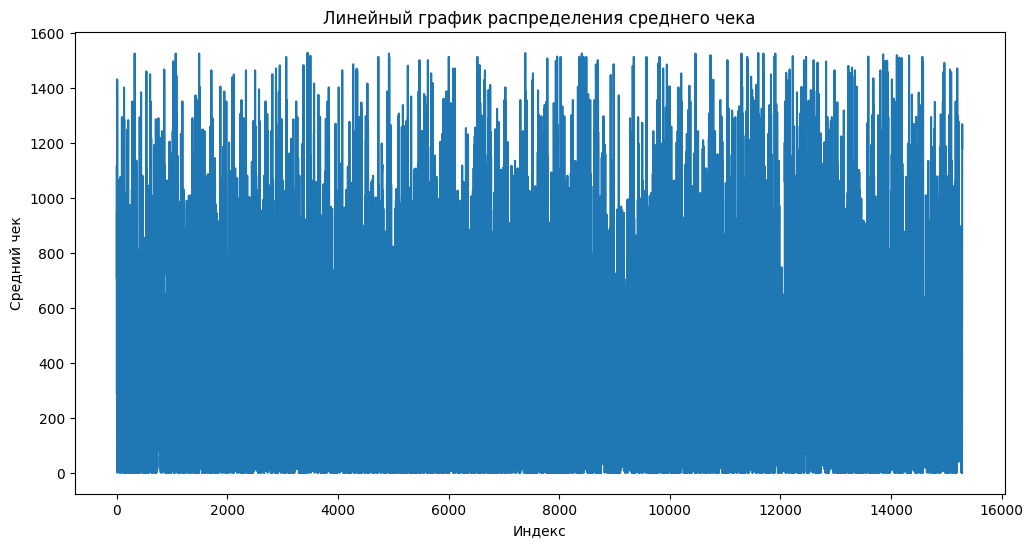

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data['avg_bill'])
plt.title('Линейный график распределения среднего чека')
plt.xlabel('Индекс')
plt.ylabel('Средний чек')
plt.show()

#### Заметим, что средний чек нестабилен, поэтому использование методов машинного обучения нецелесообразен

## Выводы гипотез
Гипотеза 1: Влияние жалоб на заказы -
       Корреляция между количеством жалоб и средним чеком: -0.0147
        Объяснение: Корреляция близка к нулю, что указывает на отсутствие линейной связи между количеством жалоб и средним чеком. Это означает, что количество жалоб не имеет значительного влияния на средний чек.

Гипотеза 2: Влияние скидок на средний чек -
   Корреляция между количеством заказов со скидками и средним чеком: -0.0093
        Объяснение: Корреляция также близка к нулю, что указывает на отсутствие линейной связи между количеством заказов со скидками и средним чеком. Это означает, что количество заказов со скидками не оказывает значительного влияния на средний чек.

Гипотеза 3: Различия в предпочтениях по каналам заказа -
    ANOVA для среднего чека по каналам заказа: p-value = 0.0
        Объяснение: P-value равен нулю, что означает, что существуют значимые различия в среднем чеке в зависимости от канала заказа (магазин, сайт, мобильное приложение). Это говорит о том, что средний чек действительно зависит от канала, через который был сделан заказ.

Гипотеза 4: Влияние маркетинговых кампаний -
    ANOVA для среднего чека по результатам маркетинговых кампаний: p-value = 2.41e-29
        Объяснение: P-value также практически равен нулю, что означает, что существуют значимые различия в среднем чеке в зависимости от результатов маркетинговых кампаний. Это говорит о том, что маркетинговые кампании оказывают значительное влияние на средний чек.

Общий вывод -
    Жалобы и скидки: Не оказывают значительного влияния на средний чек. Корреляции близки к нулю.
    Каналы заказа и маркетинговые кампании: Оказывают значительное влияние на средний чек. Значения p-value показывают, что различия между группами значимы.

## Решения для бизнеса



**Сегментация и таргетирование пользователей:**
    Сегментация пользователей по доходу и возрасту для таргетированных маркетинговых кампаний.
    Пользователи с более высоким доходом и активные пользователи могут быть целевой аудиторией для специальных предложений и программ лояльности.

**A/B тестирование:** Проводите A/B тестирование для новых маркетинговых идей, чтобы выявить наиболее эффективные подходы.

**Промо-акции для каждого канала:** Запускайте специальные промо-акции для каждого канала, чтобы стимулировать заказы через наиболее прибыльные каналы.

**Обратная связь:** Собирайте и анализируйте обратную связь от клиентов, чтобы выявлять и устранять проблемы, связанные с клиентским опытом.

**Программа лояльности:** Внедрите или улучшите программу лояльности, чтобы стимулировать повторные покупки без необходимости частого использования скидок.

**Анализ поведения:** Сегментируйте клиентов на основе их поведения, предпочтений и истории покупок.

**Целевые предложения:** Создавайте специальные предложения и акции для каждого сегмента, чтобы максимально удовлетворить потребности каждой группы.